In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
#---Open the look-up-table made in water_vapor_abs
mass_ext_df_13 = pd.read_pickle('tables/mass_ext_band13')

#---Open the optical mass made in water_vapor_profile
optical_mass_df = pd.read_pickle('tables/optical_mass_example')

In [32]:
mass_ext_df_13

,1013.171226,911.854103,810.536981,709.219858,607.902736,506.585613,405.268490,303.951368,202.634245,101.317123
174,8451.597627,8469.672828,8487.708498,8504.987040,8521.892173,8537.240402,8550.829581,8563.752987,8576.395605,8578.753252
184,13431.982442,13459.654218,13486.986066,13513.297325,13539.121070,13561.758915,13582.692339,13602.705012,13621.144926,13624.151403
194,20542.636815,20583.424037,20623.367086,20661.965361,20699.755910,20732.276453,20763.246405,20793.019322,20818.784452,20822.680139
204,30375.550077,30433.668912,30490.020472,30544.891664,30598.147582,30643.777027,30687.988018,30730.733948,30765.389140,30770.576868
214,43603.203531,43683.363793,43760.724612,43836.733895,43908.364277,43971.830934,44033.034939,44092.576780,44137.609497,44144.796746
224,60979.251384,61086.825553,61190.835744,61293.512713,61387.146312,61473.345849,61555.826680,61636.577502,61693.549630,61703.611009
234,83341.099046,83482.411459,83619.078600,83754.854114,83874.480388,83988.814818,84097.339854,84204.394472,84274.721368,84289.280272
244,111613.753910,111794.900257,111971.785039,112146.026536,112297.872378,112445.709765,112586.326969,112725.251327,112810.777408,112832.010660
254,146815.646449,147044.818576,147270.078436,147487.842032,147679.204160,147866.478839,148046.148967,148223.332038,148325.808468,148356.571556
264,190068.861603,190354.981603,190637.567293,190903.941583,191143.059115,191376.804083,191602.848771,191825.447331,191947.096398,191991.159773


In [33]:
optical_mass_df

,Optical Mass,Temperature
1000.0,60.558811,298.361359
975.0,55.662526,296.960083
950.0,51.002379,295.527649
925.0,46.582313,294.047638
900.0,42.395465,292.535461
850.0,35.290392,288.929932
800.0,31.486416,284.115479
750.0,28.911608,278.982178
700.0,25.940340,273.714355
650.0,13.281299,269.702179


Using look-up-table:

In [36]:
temperature_point = 292
pressure_point = 900

#---Find the nearest temperature and pressure indices
nearest_temperature = mass_ext_df_13.index[((mass_ext_df_13.index.values - temperature_point)**2).argmin()]
nearest_pressure = mass_ext_df_13.columns[((mass_ext_df_13.columns.values - pressure_point)**2).argmin()]

#---Query the lookup table with the nearest indices
nearest_value = mass_ext_df_13.loc[nearest_temperature, nearest_pressure]

print("Nearest temperature:", nearest_temperature)
print("Nearest pressure:", nearest_pressure)
print("Nearest value in the lookup table:", nearest_value)

Nearest temperature: 284
Nearest pressure: 911.854103343465
Nearest value in the lookup table: 306226.26858844515


In [44]:
optical_thickness = []
pressure_profile = range(1000, 0, -100)

for pressure_value in pressure_profile:
    temperature_value = optical_mass_df.loc[pressure_value].Temperature
    optical_mass_value = optical_mass_df.loc[pressure_value]['Optical Mass']

    #---Find the nearest temperature and pressure indices
    nearest_temperature = mass_ext_df_13.index[((mass_ext_df_13.index.values - temperature_value)**2).argmin()]
    nearest_pressure = mass_ext_df_13.columns[((mass_ext_df_13.columns.values - pressure_value)**2).argmin()]

    #---Query the lookup table with the nearest indices
    mass_ext_value = mass_ext_df_13.loc[nearest_temperature, nearest_pressure]

    print("Profile:", pressure_value, round(temperature_value, 1), "LUT:", round(nearest_pressure,1), nearest_temperature)
    print("Optical mass:", round(optical_mass_value,1), "Mass ext:", round(mass_ext_value,1))

    optical_thickness.append(optical_mass_value*mass_ext_value)


Profile: 1000 298.4 LUT: 1013.2 284
Optical mass: 60.6 Mass ext: 305795.3
Profile: 900 292.5 LUT: 911.9 284
Optical mass: 42.4 Mass ext: 306226.3
Profile: 800 284.1 LUT: 810.5 284
Optical mass: 31.5 Mass ext: 306655.0
Profile: 700 273.7 LUT: 709.2 274
Optical mass: 25.9 Mass ext: 243631.1
Profile: 600 266.4 LUT: 607.9 264
Optical mass: 2.9 Mass ext: 191143.1
Profile: 500 258.0 LUT: 506.6 254
Optical mass: 8.8 Mass ext: 147866.5
Profile: 400 247.4 LUT: 405.3 244
Optical mass: 0.1 Mass ext: 112586.3
Profile: 300 236.6 LUT: 304.0 234
Optical mass: 1.0 Mass ext: 84204.4
Profile: 200 221.4 LUT: 202.6 224
Optical mass: 0.0 Mass ext: 61693.5
Profile: 100 210.5 LUT: 101.3 214
Optical mass: 0.0 Mass ext: 44144.8


I believe optical thickness should be on the scale of 0.1 to 10, roughly.

In [46]:
data = {
    'Optical Thickness': optical_thickness
}

optical_thickness_df = pd.DataFrame(data, index=pressure_profile)
optical_thickness_df

,Optical Thickness
1000,1.851860e+07
900,1.298260e+07
800,9.655467e+06
700,6.319873e+06
600,5.564619e+05
500,1.308595e+06
400,1.381311e+04
300,8.640009e+04
200,1.876195e+03
100,1.063717e+02


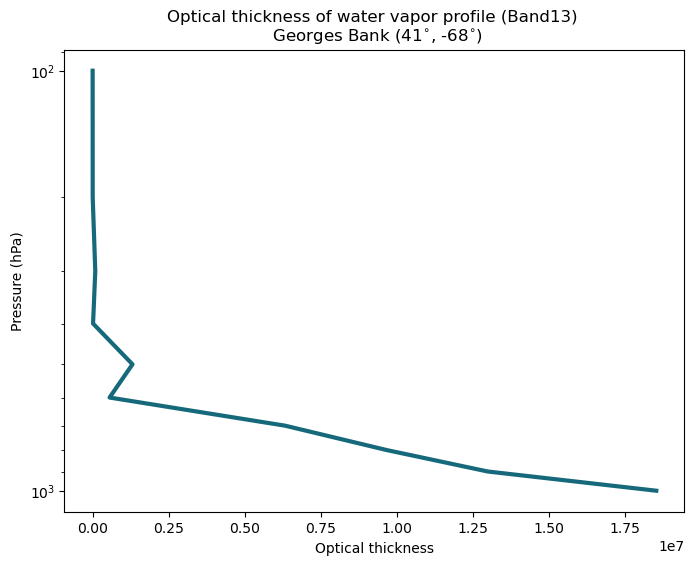

In [69]:
fig, ax = plt.subplots(1, figsize=(8,6))

ax.plot(optical_thickness_df, optical_thickness_df.index, c='#16697A', linewidth=3)

ax.set_title('Optical thickness of water vapor profile (Band13) \n Georges Bank (41$^{\circ}$, -68$^{\circ}$)')
ax.set_xlabel('Optical thickness')
ax.set_ylabel('Pressure (hPa)')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.show()

Calculating transmittance from optical thickness ($\tau$):
* what does $\mu_{\text{sat}}$ refer to?

$$
T_\lambda(z, \text{TOA}) = \text{exp}\left(-\sum_z^\text{TOA} \frac{\tau}{\mu_{\text{sat}}}\right)
$$